The aim is to segment the groups that exit among online shoppers using the online shoppers intention data found at:
https://archive.ics.uci.edu/ml/machine-learning-databases/00468/ 


A description of the data is given at:
with a desciprion of the set at https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

In [424]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

#### Exploratory Data Analysis

In [425]:
filepath = "online_shoppers_intention.csv"
data = pd.read_csv(filepath)

In [426]:
data_pd = pd.DataFrame(data)

In [427]:
data_pd.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [428]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

There are no missing values

In [429]:
data_pd['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [430]:
data_pd['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [431]:
data_pd.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [432]:
data_pd.shape

(12330, 18)

Some visualization

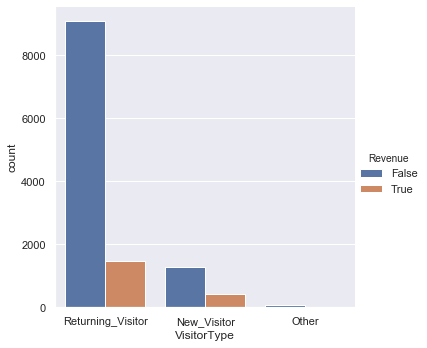

In [530]:
sns.catplot(data=data_pd, hue='Revenue', x='VisitorType', kind='count')

More revenue is made from new vistors

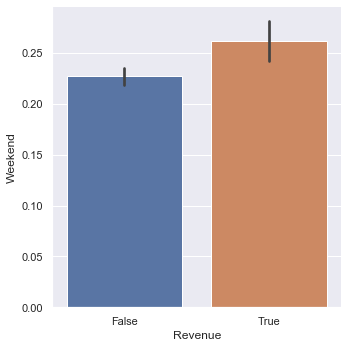

In [434]:
sns.catplot(data=data_pd, x='Revenue', y='Weekend', kind='bar')

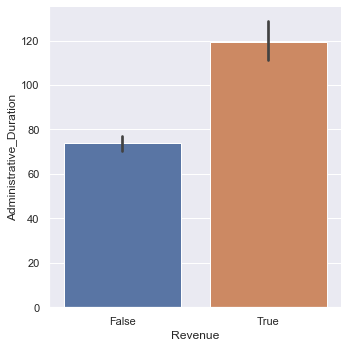

In [435]:
sns.catplot(data=data_pd, x='Revenue', y='Administrative_Duration', kind='bar')

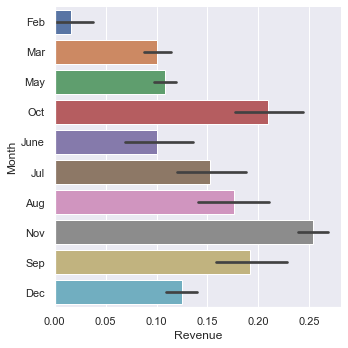

In [436]:
sns.catplot(data=data_pd, x='Revenue', y='Month', kind='bar')

More revenues are made from customers who bought things in November, October and September

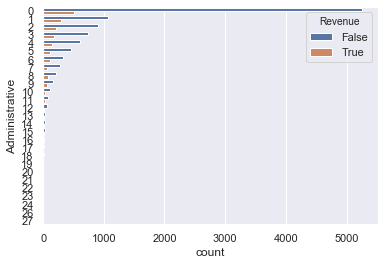

In [437]:
sns.countplot(data=data_pd, y='Administrative', hue='Revenue')

The focus will be on customers that bought something, thus only those with Revenue = True

In [438]:
data_pd_rev = data_pd[data_pd['Revenue']==True]
data_pd_rev.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True


In [439]:
data_pd_rev.drop("Revenue", axis=1, inplace=True)
data_pd_rev.head()

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False


To get those who did not make a purchase



In [440]:
data_pd_norev = data_pd[data_pd['Revenue']==False]
data_pd_norev.drop('Revenue', axis=1, inplace=True)
data_pd_norev.head()

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


Visualization on those who made a purchase

In [441]:
data_pd_rev.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Administrative,1.000000,0.611557,0.377071,0.282258,0.402279,0.384304,-0.040219,-0.120320,-0.156647,-0.075787,0.026507,-0.046420,-0.044018,-0.001450,-0.008765
Administrative_Duration,0.611557,1.000000,0.286933,0.223618,0.235575,0.288256,-0.034641,-0.085423,-0.087388,-0.059905,-0.000827,-0.016751,-0.032186,0.020708,-0.039421
Informational,0.377071,0.286933,1.000000,0.627955,0.337087,0.354347,0.018997,-0.035256,-0.136234,-0.024415,-0.019335,-0.059427,-0.069373,-0.023969,-0.015132
Informational_Duration,0.282258,0.223618,0.627955,1.000000,0.262400,0.295949,0.003795,-0.040650,-0.100227,0.011606,-0.001243,-0.029496,-0.044048,-0.042399,0.002035
ProductRelated,0.402279,0.235575,0.337087,0.262400,1.000000,0.907385,-0.031623,-0.153409,-0.177798,-0.053718,0.006406,-0.045546,-0.095938,-0.063915,-0.033819
ProductRelated_Duration,0.384304,0.288256,0.354347,0.295949,0.907385,1.000000,-0.023473,-0.117584,-0.177121,-0.050065,0.003826,-0.039924,-0.079437,-0.061015,-0.040393
BounceRates,-0.040219,-0.034641,0.018997,0.003795,-0.031623,-0.023473,1.000000,0.737453,-0.154183,0.025174,0.028927,0.002832,-0.029810,0.075912,-0.043630
ExitRates,-0.120320,-0.085423,-0.035256,-0.040650,-0.153409,-0.117584,0.737453,1.000000,-0.230696,0.022216,-0.026183,0.003704,-0.027982,0.056203,-0.039036
PageValues,-0.156647,-0.087388,-0.136234,-0.100227,-0.177798,-0.177121,-0.154183,-0.230696,1.000000,-0.026021,0.078673,0.112523,0.061310,0.080345,0.001172
SpecialDay,-0.075787,-0.059905,-0.024415,0.011606,-0.053718,-0.050065,0.025174,0.022216,-0.026021,1.000000,0.006847,-0.001428,0.019334,-0.003780,-0.015062


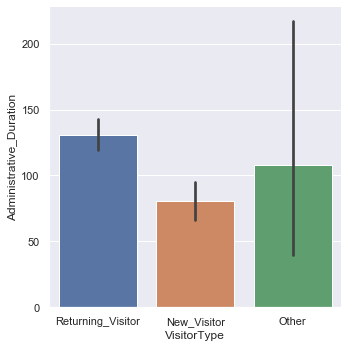

In [442]:
sns.catplot(data=data_pd_rev, y='Administrative_Duration', x="VisitorType", kind='bar')

More Returning visitors who spent a long time in th administrative pages bought something

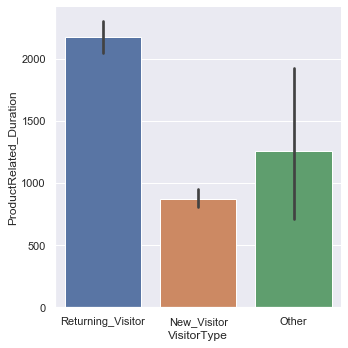

In [443]:
sns.catplot(data=data_pd_rev, y='ProductRelated_Duration', x="VisitorType", kind='bar')

Returning visitors with high product related duration bought something

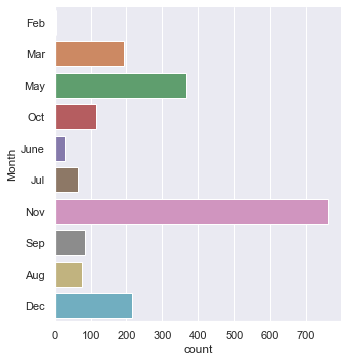

In [444]:
sns.catplot(data=data_pd_rev, y='Month', kind='count')

Most revenue most generated in November

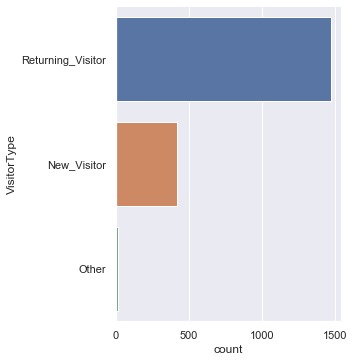

In [445]:
sns.catplot(data=data_pd_rev, y='VisitorType', kind='count')

Most revenue is generated from returning visitors

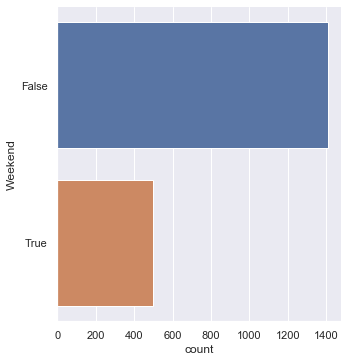

In [446]:
sns.catplot(data=data_pd_rev, y='Weekend', kind='count')

Most revenue are not generated from weekend sites visits

#### Feature Scaling

In [447]:
data_pd_rev.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False


Converting the categorical variables of 'Month' and 'Weekend' to numerical values

In [448]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_pd_rev['Weekend'] = le.fit_transform(data_pd_rev.Weekend)
data_pd_rev['Month'] = le.fit_transform(data_pd_rev.VisitorType)
data_pd_rev['Weekend'].sample(5)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1637     1
3551     0
5783     0
11486    1
11878    1
Name: Weekend, dtype: int64

In [449]:
data_pd_rev['Month'].sample(5)

11349    2
6163     0
10262    0
7961     2
7578     0
Name: Month, dtype: int32

Converting the Visitor Type to categorical variables using one_hot_encoding

In [450]:
one_hot_encode_cols = data_pd_rev.dtypes[data_pd_rev.dtypes == np.object] 

one_hot_encode_cols = one_hot_encode_cols.index.tolist() #list of categorical fields

data_pd_rev[one_hot_encode_cols].head()

,VisitorType
65,Returning_Visitor
76,Returning_Visitor
101,Returning_Visitor
188,Returning_Visitor
196,New_Visitor


In [451]:
data_pd_rev = pd.get_dummies(data_pd_rev, columns=one_hot_encode_cols,) #drop_first=True)
data_pd_rev.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,2,2,2,3,1,0,0,0,1
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,2,6,1,2,0,0,0,1
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,2,1,1,7,4,1,0,0,1
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,2,2,2,7,2,0,0,0,1
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,0,2,2,4,2,0,1,0,0


In [452]:
data_pd_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 65 to 12313
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 1908 non-null   int64  
 1   Administrative_Duration        1908 non-null   float64
 2   Informational                  1908 non-null   int64  
 3   Informational_Duration         1908 non-null   float64
 4   ProductRelated                 1908 non-null   int64  
 5   ProductRelated_Duration        1908 non-null   float64
 6   BounceRates                    1908 non-null   float64
 7   ExitRates                      1908 non-null   float64
 8   PageValues                     1908 non-null   float64
 9   SpecialDay                     1908 non-null   float64
 10  Month                          1908 non-null   int32  
 11  OperatingSystems               1908 non-null   int64  
 12  Browser                        1908 non-null  

In [453]:
data_pd_rev.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.611557,0.377071,0.282258,0.402279,0.384304,-0.040219,-0.120320,-0.156647,-0.075787,0.172486,0.026507,-0.046420,-0.044018,-0.001450,-0.008765,-0.170008,-0.023575,0.172892
Administrative_Duration,0.611557,1.000000,0.286933,0.223618,0.235575,0.288256,-0.034641,-0.085423,-0.087388,-0.059905,0.103170,-0.000827,-0.016751,-0.032186,0.020708,-0.039421,-0.102668,-0.005178,0.102446
Informational,0.377071,0.286933,1.000000,0.627955,0.337087,0.354347,0.018997,-0.035256,-0.136234,-0.024415,0.180114,-0.019335,-0.059427,-0.069373,-0.023969,-0.015132,-0.176669,-0.032421,0.181383
Informational_Duration,0.282258,0.223618,0.627955,1.000000,0.262400,0.295949,0.003795,-0.040650,-0.100227,0.011606,0.119327,-0.001243,-0.029496,-0.044048,-0.042399,0.002035,-0.117560,-0.016792,0.119660
ProductRelated,0.402279,0.235575,0.337087,0.262400,1.000000,0.907385,-0.031623,-0.153409,-0.177798,-0.053718,0.241086,0.006406,-0.045546,-0.095938,-0.063915,-0.033819,-0.237131,-0.037430,0.242139
ProductRelated_Duration,0.384304,0.288256,0.354347,0.295949,0.907385,1.000000,-0.023473,-0.117584,-0.177121,-0.050065,0.233539,0.003826,-0.039924,-0.079437,-0.061015,-0.040393,-0.230991,-0.024578,0.233292
BounceRates,-0.040219,-0.034641,0.018997,0.003795,-0.031623,-0.023473,1.000000,0.737453,-0.154183,0.025174,0.174205,0.028927,0.002832,-0.029810,0.075912,-0.043630,-0.170843,-0.031641,0.175464
ExitRates,-0.120320,-0.085423,-0.035256,-0.040650,-0.153409,-0.117584,0.737453,1.000000,-0.230696,0.022216,0.193729,-0.026183,0.003704,-0.027982,0.056203,-0.039036,-0.189859,-0.036374,0.195258
PageValues,-0.156647,-0.087388,-0.136234,-0.100227,-0.177798,-0.177121,-0.154183,-0.230696,1.000000,-0.026021,-0.197538,0.078673,0.112523,0.061310,0.080345,0.001172,0.179559,0.164827,-0.212945
SpecialDay,-0.075787,-0.059905,-0.024415,0.011606,-0.053718,-0.050065,0.025174,0.022216,-0.026021,1.000000,0.022086,0.006847,-0.001428,0.019334,-0.003780,-0.015062,-0.020205,-0.017251,0.023681


In [454]:
data_pd_rev.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.00000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,1.549266,2.092767,2.453354,3.082285,4.021488,0.261530,0.221174,0.008386,0.77044
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.830832,0.929779,1.897042,2.407173,3.987140,0.439583,0.415146,0.091213,0.42066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.00000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.00000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000,1.00000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,2.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.00000


Splitting into train and test sets

In [455]:
from sklearn.model_selection import train_test_split

data_pd_rev_train, data_pd_rev_test = train_test_split(data_pd_rev, test_size=0.3, random_state=40)

In [456]:
data_pd_rev_train.shape

(1335, 19)

In [457]:
data_pd_rev_test.shape

(573, 19)

Scaling the data

In [458]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

data_pd_rev_s = s.fit_transform(data_pd_rev)



In [459]:
feature_columns=data_pd_rev.columns
feature_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [460]:
pd.DataFrame(data_pd_rev_s, columns=feature_columns).describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03,1.908000e+03
mean,-1.652170e-16,-5.638397e-17,2.177387e-16,2.539897e-17,1.167829e-15,-1.091021e-16,1.394470e-16,-2.857020e-17,-5.139146e-16,1.830966e-15,6.412294e-17,2.580774e-16,6.919110e-16,2.864003e-16,-8.929498e-16,-1.438402e-16,-4.738814e-16,1.385262e-15,-2.661509e-16
std,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00
min,-9.099238e-01,-5.942606e-01,-5.169484e-01,-3.357815e-01,-8.276126e-01,-8.116468e-01,-4.200820e-01,-1.188114e+00,-7.749404e-01,-1.875927e-01,-1.865204e+00,-1.175606e+00,-7.663170e-01,-8.652600e-01,-7.580072e-01,-5.951066e-01,-5.329014e-01,-9.196010e-02,-1.831984e+00
25%,-9.099238e-01,-5.942606e-01,-5.169484e-01,-3.357815e-01,-5.701111e-01,-5.772186e-01,-4.200820e-01,-6.096169e-01,-6.714480e-01,-1.875927e-01,5.426508e-01,-9.979966e-02,-2.390423e-01,-8.652600e-01,-5.071351e-01,-5.951066e-01,-5.329014e-01,-9.196010e-02,5.458564e-01
50%,-3.736660e-01,-3.338103e-01,-5.169484e-01,-3.357815e-01,-3.297764e-01,-3.315022e-01,-4.200820e-01,-2.160015e-01,-2.986233e-01,-1.875927e-01,5.426508e-01,-9.979966e-02,-2.390423e-01,-4.497261e-01,-5.071351e-01,-5.951066e-01,-5.329014e-01,-9.196010e-02,5.458564e-01
75%,4.307207e-01,1.571659e-01,1.406100e-01,-2.250422e-01,1.508930e-01,1.686279e-01,1.095497e-01,3.308118e-01,3.306515e-01,-1.875927e-01,5.426508e-01,-9.979966e-02,-2.390423e-01,3.813416e-01,-5.390858e-03,1.680371e+00,-5.329014e-01,-9.196010e-02,5.458564e-01
max,6.061427e+00,9.784378e+00,7.373752e+00,9.966858e+00,8.339440e+00,1.087280e+01,1.599850e+01,1.096329e+01,9.507483e+00,7.910299e+00,5.426508e-01,6.355039e+00,5.560980e+00,2.459011e+00,4.008563e+00,1.680371e+00,1.876520e+00,1.087428e+01,5.458564e-01


#### Modelling

##### K-means

In [461]:
# first model to be used is Kmeans for clustering of data

from sklearn.cluster import KMeans

km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data_pd_rev_s)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

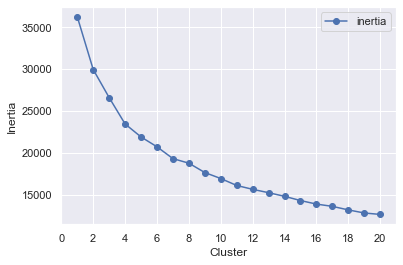

In [462]:
# plotting the k-means 

plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

The number of k-means clusters will be chosen to be 4

In [463]:
km =KMeans(n_clusters=4, random_state = 42)
km.fit(data_pd_rev_s)

KMeans(n_clusters=4, random_state=42)

In [464]:
km.labels_.shape

(1908,)

In [465]:
seg = pd.DataFrame(km.labels_)
seg.head()

,0
0,0
1,3
2,0
3,0
4,2


In [466]:
seg = seg.rename(columns ={seg.columns[0]:'segments'})
seg.head()

,segments
0,0
1,3
2,0
3,0
4,2


In [467]:
df_segn_km = pd.DataFrame(data_pd_rev_s.copy(), columns = feature_columns)
df_segn_km.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.105537,-0.157414,-0.516948,-0.335782,-0.364110,-0.466288,-0.420082,-0.419922,-0.123597,6.290720,0.542651,-0.099800,-0.239042,-0.034192,-0.758007,-0.595107,-0.532901,-0.09196,0.545856
1,1.771365,4.407513,-0.516948,-0.335782,-0.209609,0.101718,-0.063156,-0.307577,-0.449798,-0.187593,0.542651,-0.099800,1.870057,-0.865260,-0.507135,-0.595107,-0.532901,-0.09196,0.545856
2,0.162592,-0.290872,-0.516948,-0.335782,-0.501444,-0.549059,-0.420082,0.451361,-0.276515,7.910299,0.542651,-1.175606,-0.766317,1.627943,-0.005391,1.680371,-0.532901,-0.09196,0.545856
3,1.503236,-0.039705,0.140610,-0.053105,0.013559,-0.003197,-0.420082,0.070096,-0.726450,-0.187593,0.542651,-0.099800,-0.239042,1.627943,-0.507135,-0.595107,-0.532901,-0.09196,0.545856
4,-0.373666,-0.315740,0.140610,0.503506,0.322561,0.297444,-0.420082,-0.835899,-0.225164,-0.187593,-1.865204,-0.099800,-0.239042,0.381342,-0.507135,-0.595107,1.876520,-0.09196,-1.831984


In [468]:
df_segn_km = pd.concat([seg, df_segn_km], axis=1)
df_segn_km.head()

,segments,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,-0.105537,-0.157414,-0.516948,-0.335782,-0.364110,-0.466288,-0.420082,-0.419922,-0.123597,6.290720,0.542651,-0.099800,-0.239042,-0.034192,-0.758007,-0.595107,-0.532901,-0.09196,0.545856
1,3,1.771365,4.407513,-0.516948,-0.335782,-0.209609,0.101718,-0.063156,-0.307577,-0.449798,-0.187593,0.542651,-0.099800,1.870057,-0.865260,-0.507135,-0.595107,-0.532901,-0.09196,0.545856
2,0,0.162592,-0.290872,-0.516948,-0.335782,-0.501444,-0.549059,-0.420082,0.451361,-0.276515,7.910299,0.542651,-1.175606,-0.766317,1.627943,-0.005391,1.680371,-0.532901,-0.09196,0.545856
3,0,1.503236,-0.039705,0.140610,-0.053105,0.013559,-0.003197,-0.420082,0.070096,-0.726450,-0.187593,0.542651,-0.099800,-0.239042,1.627943,-0.507135,-0.595107,-0.532901,-0.09196,0.545856
4,2,-0.373666,-0.315740,0.140610,0.503506,0.322561,0.297444,-0.420082,-0.835899,-0.225164,-0.187593,-1.865204,-0.099800,-0.239042,0.381342,-0.507135,-0.595107,1.876520,-0.09196,-1.831984


In [469]:
df_segn_Km_group =df_segn_km.groupby(['segments']).mean()
df_segn_Km_group

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
segments,,,,,,,,,,,,,,,,,,,
0,-0.226740,-0.181266,-0.236193,-0.224997,-0.218927,-0.219453,0.128182,0.184600,-0.045630,0.051775,0.542651,-0.020765,-0.019382,-0.000792,0.003282,0.028339,-0.532901,-0.091960,0.545856
1,-0.256360,-0.056310,-0.352559,-0.182604,-0.407027,-0.267267,-0.344070,-0.395543,1.792374,-0.187593,-0.661277,5.548184,5.000751,2.277215,3.459780,-0.452889,-0.532901,10.874282,-1.831984
2,-0.319024,-0.192659,-0.331523,-0.220604,-0.444981,-0.433459,-0.320590,-0.356274,0.336946,-0.037916,-1.865204,-0.125293,-0.032880,0.086923,-0.049383,-0.028933,1.876520,-0.091960,-1.831984
3,1.281366,0.932677,1.338080,1.138460,1.430009,1.409276,-0.024003,-0.181809,-0.377238,-0.130675,0.542651,-0.037932,-0.139652,-0.230675,-0.122411,-0.042594,-0.532901,-0.091960,0.545856


So four groups are found.
The first  are returnees (returning visitors) 
The second are special day visitors (other visitors with high trafffic type on special days and weekends)
The third are year end new visitors (new visitors that come toward the end of the year)
The fourt are  product focused visitors (returning visitors with high production duration)

In [470]:
df_segn_Km_group.rename({0:'returnees',
                         1:'special days',
                         2: 'year end',
                         3: 'product focused'})

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
segments,,,,,,,,,,,,,,,,,,,
returnees,-0.226740,-0.181266,-0.236193,-0.224997,-0.218927,-0.219453,0.128182,0.184600,-0.045630,0.051775,0.542651,-0.020765,-0.019382,-0.000792,0.003282,0.028339,-0.532901,-0.091960,0.545856
special days,-0.256360,-0.056310,-0.352559,-0.182604,-0.407027,-0.267267,-0.344070,-0.395543,1.792374,-0.187593,-0.661277,5.548184,5.000751,2.277215,3.459780,-0.452889,-0.532901,10.874282,-1.831984
year end,-0.319024,-0.192659,-0.331523,-0.220604,-0.444981,-0.433459,-0.320590,-0.356274,0.336946,-0.037916,-1.865204,-0.125293,-0.032880,0.086923,-0.049383,-0.028933,1.876520,-0.091960,-1.831984
product focused,1.281366,0.932677,1.338080,1.138460,1.430009,1.409276,-0.024003,-0.181809,-0.377238,-0.130675,0.542651,-0.037932,-0.139652,-0.230675,-0.122411,-0.042594,-0.532901,-0.091960,0.545856


In [471]:
df_segn_km["Labels"]=df_segn_km["segments"].map(({0:'returnees',
                                                               1:'special days',
                                                               2: 'regulars',
                                                               3: 'year end'}))

In [472]:
df_segn_km.head()

,segments,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Labels
0,0,-0.105537,-0.157414,-0.516948,-0.335782,-0.364110,-0.466288,-0.420082,-0.419922,-0.123597,...,0.542651,-0.099800,-0.239042,-0.034192,-0.758007,-0.595107,-0.532901,-0.09196,0.545856,returnees
1,3,1.771365,4.407513,-0.516948,-0.335782,-0.209609,0.101718,-0.063156,-0.307577,-0.449798,...,0.542651,-0.099800,1.870057,-0.865260,-0.507135,-0.595107,-0.532901,-0.09196,0.545856,year end
2,0,0.162592,-0.290872,-0.516948,-0.335782,-0.501444,-0.549059,-0.420082,0.451361,-0.276515,...,0.542651,-1.175606,-0.766317,1.627943,-0.005391,1.680371,-0.532901,-0.09196,0.545856,returnees
3,0,1.503236,-0.039705,0.140610,-0.053105,0.013559,-0.003197,-0.420082,0.070096,-0.726450,...,0.542651,-0.099800,-0.239042,1.627943,-0.507135,-0.595107,-0.532901,-0.09196,0.545856,returnees
4,2,-0.373666,-0.315740,0.140610,0.503506,0.322561,0.297444,-0.420082,-0.835899,-0.225164,...,-1.865204,-0.099800,-0.239042,0.381342,-0.507135,-0.595107,1.876520,-0.09196,-1.831984,regulars


##### Principal component Analysis

In [473]:
data_pd_rev_s.shape

(1908, 19)

In [474]:
pd.DataFrame(data_pd_rev_s).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.105537,-0.157414,-0.516948,-0.335782,-0.364110,-0.466288,-0.420082,-0.419922,-0.123597,6.290720,0.542651,-0.099800,-0.239042,-0.034192,-0.758007,-0.595107,-0.532901,-0.09196,0.545856
1,1.771365,4.407513,-0.516948,-0.335782,-0.209609,0.101718,-0.063156,-0.307577,-0.449798,-0.187593,0.542651,-0.099800,1.870057,-0.865260,-0.507135,-0.595107,-0.532901,-0.09196,0.545856
2,0.162592,-0.290872,-0.516948,-0.335782,-0.501444,-0.549059,-0.420082,0.451361,-0.276515,7.910299,0.542651,-1.175606,-0.766317,1.627943,-0.005391,1.680371,-0.532901,-0.09196,0.545856
3,1.503236,-0.039705,0.140610,-0.053105,0.013559,-0.003197,-0.420082,0.070096,-0.726450,-0.187593,0.542651,-0.099800,-0.239042,1.627943,-0.507135,-0.595107,-0.532901,-0.09196,0.545856
4,-0.373666,-0.315740,0.140610,0.503506,0.322561,0.297444,-0.420082,-0.835899,-0.225164,-0.187593,-1.865204,-0.099800,-0.239042,0.381342,-0.507135,-0.595107,1.876520,-0.09196,-1.831984


In [475]:
#the second model to be used is the pricipal compenent analyis (PCA)
# for dimensional reduction

from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 18): #NB:there are 20 columns in the scaled data
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_pd_rev_s)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               "ind_var":PCAmod.explained_variance_ratio_[-1],
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': feature_columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,ind_var,var
n,,,
1,PCA(n_components=1),0.204802,0.204802
2,PCA(n_components=2),0.132554,0.337356
3,PCA(n_components=3),0.112192,0.449548
4,PCA(n_components=4),0.081788,0.531336
5,PCA(n_components=5),0.060432,0.591768
6,PCA(n_components=6),0.056811,0.648579
7,PCA(n_components=7),0.052594,0.701173
8,PCA(n_components=8),0.051066,0.752239
9,PCA(n_components=9),0.048592,0.800831


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'cummulative explained variance')

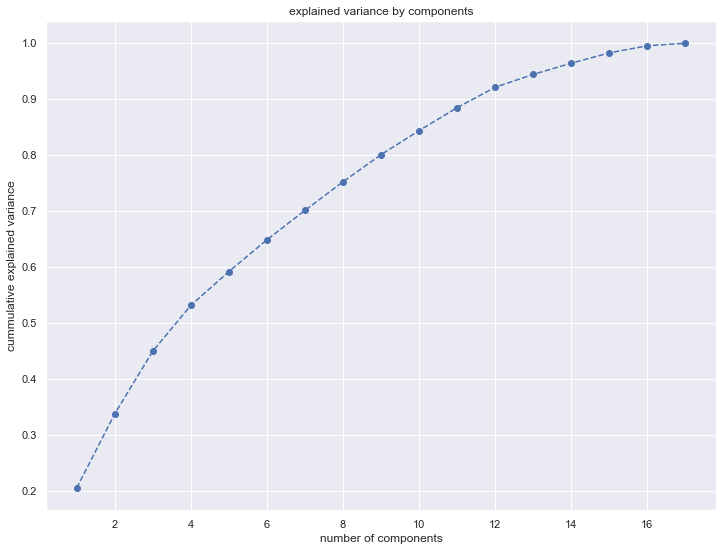

In [476]:
plt.figure(figsize=(12,9))
plt.plot(range(1,18), pca_df['var'], marker = 'o', linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')

Text(0, 0.5, 'explained variance')

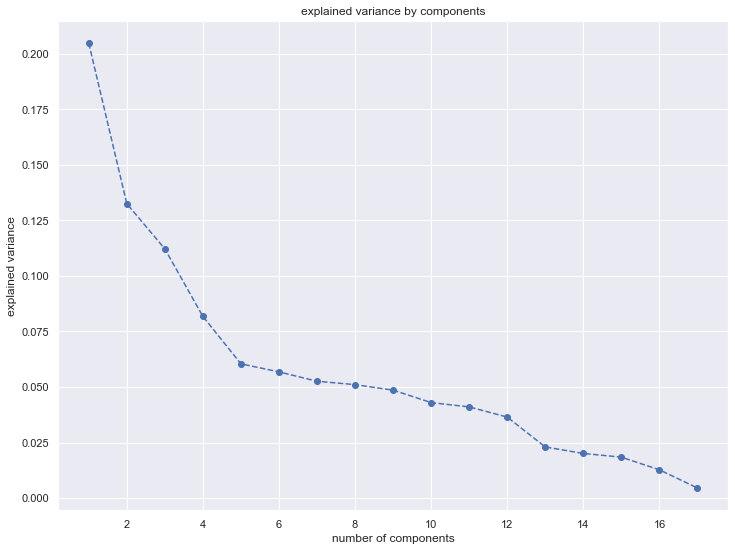

In [477]:
plt.figure(figsize=(12,9))
plt.plot(range(1,18), pca_df['ind_var'], marker = 'o', linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('explained variance')

From the graph, pronounced drops in explained variance occured after two and five components. Therefore five components will be used. 

In [478]:
#about 59% variance is exlained by 5 components of the PCA
PCAmod = PCA(n_components=5) 
PCAmod.fit(data_pd_rev_s)

PCA(n_components=5)

In [479]:
PCAmod.components_

array([[ 0.26897686,  0.20617916,  0.26909598,  0.22116818,  0.32053461,
         0.3229495 ,  0.08946385,  0.06580558, -0.18366147, -0.01210288,
         0.40642383, -0.02538347, -0.06513477, -0.08083848, -0.04008753,
        -0.00567534, -0.39826671, -0.07665887,  0.40966863],
       [-0.2934867 , -0.26485115, -0.245212  , -0.23571305, -0.28635062,
        -0.29076019,  0.32625373,  0.39001959, -0.05878144,  0.07255651,
         0.31191051,  0.01046585,  0.02735007,  0.01269044,  0.05695416,
         0.01695479, -0.31101407, -0.0100068 ,  0.30910729],
       [ 0.06348975,  0.06560063,  0.02247119,  0.02691296,  0.03593838,
         0.04306327, -0.00232558, -0.03566523,  0.1436981 , -0.01526399,
         0.06494219,  0.48786377,  0.46151191,  0.21825415,  0.35111198,
        -0.03455649, -0.12728296,  0.56709115,  0.0026507 ],
       [ 0.11395323,  0.13722448,  0.21449899,  0.21383837, -0.00088438,
         0.03067025,  0.56454948,  0.53334243, -0.24351165, -0.00748992,
        -0.246

In [480]:
df_pca_comp=pd.DataFrame(PCAmod.components_,
                        columns=feature_columns,
                        index=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', ])
df_pca_comp

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Component 1,0.268977,0.206179,0.269096,0.221168,0.320535,0.322950,0.089464,0.065806,-0.183661,-0.012103,0.406424,-0.025383,-0.065135,-0.080838,-0.040088,-0.005675,-0.398267,-0.076659,0.409669
Component 2,-0.293487,-0.264851,-0.245212,-0.235713,-0.286351,-0.290760,0.326254,0.390020,-0.058781,0.072557,0.311911,0.010466,0.027350,0.012690,0.056954,0.016955,-0.311014,-0.010007,0.309107
Component 3,0.063490,0.065601,0.022471,0.026913,0.035938,0.043063,-0.002326,-0.035665,0.143698,-0.015264,0.064942,0.487864,0.461512,0.218254,0.351112,-0.034556,-0.127283,0.567091,0.002651
Component 4,0.113953,0.137224,0.214499,0.213838,-0.000884,0.030670,0.564549,0.533342,-0.243512,-0.007490,-0.246715,0.026083,0.026438,-0.027199,0.110545,-0.130359,0.244436,0.022201,-0.246046
Component 5,-0.157821,-0.241247,-0.361045,-0.407703,0.501778,0.477419,0.102461,0.056980,-0.137760,-0.104886,-0.065683,0.065006,0.059397,-0.103208,-0.071194,-0.243754,0.062022,0.033714,-0.068519


In [481]:
PCAmod.transform(data_pd_rev_s)

array([[ 0.0579202 ,  1.12465207, -0.52835966, -1.12313056, -0.66422395],
       [ 1.83430774, -1.07379367,  0.84752734,  0.22992564, -0.75243297],
       [-0.01820531,  1.68787346, -0.82616337, -0.9241476 , -1.7629675 ],
       ...,
       [ 1.9257929 , -0.47326895, -0.49050961, -0.06935976,  1.22400139],
       [ 3.40188206, -1.56790823,  0.44174131,  0.14064097,  3.19583723],
       [ 0.74900894,  0.27954273, -0.26831401, -0.34104145, -0.60142977]])

In [482]:
scores_pca=PCAmod.transform(data_pd_rev_s)

###### Running k-means on the PCA model

 The third step involves using PCA on data that has been clustered by k-means

In [483]:
from sklearn.cluster import KMeans

km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(scores_pca)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

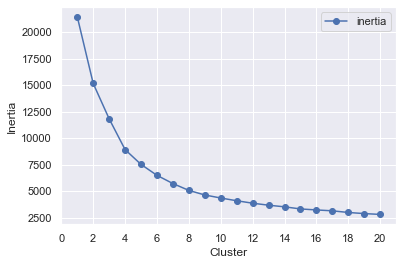

In [484]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

Using the same number of clusters (n=4)

In [485]:
km_pca =KMeans(n_clusters=4, random_state = 42)
km_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [486]:
# concatinating a copy of the scaled data and the pca data

df_segm_pca_kmeans = pd.concat([pd.DataFrame(data_pd_rev_s.copy(), columns=feature_columns).reset_index(drop = True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,0,1,2,3,4
0,-0.105537,-0.157414,-0.516948,-0.335782,-0.364110,-0.466288,-0.420082,-0.419922,-0.123597,6.290720,...,-0.758007,-0.595107,-0.532901,-0.09196,0.545856,0.057920,1.124652,-0.528360,-1.123131,-0.664224
1,1.771365,4.407513,-0.516948,-0.335782,-0.209609,0.101718,-0.063156,-0.307577,-0.449798,-0.187593,...,-0.507135,-0.595107,-0.532901,-0.09196,0.545856,1.834308,-1.073794,0.847527,0.229926,-0.752433
2,0.162592,-0.290872,-0.516948,-0.335782,-0.501444,-0.549059,-0.420082,0.451361,-0.276515,7.910299,...,-0.005391,1.680371,-0.532901,-0.09196,0.545856,-0.018205,1.687873,-0.826163,-0.924148,-1.762967
3,1.503236,-0.039705,0.140610,-0.053105,0.013559,-0.003197,-0.420082,0.070096,-0.726450,-0.187593,...,-0.507135,-0.595107,-0.532901,-0.09196,0.545856,1.101940,-0.057452,0.083033,-0.269097,-0.287533
4,-0.373666,-0.315740,0.140610,0.503506,0.322561,0.297444,-0.420082,-0.835899,-0.225164,-0.187593,...,-0.507135,-0.595107,1.876520,-0.09196,-1.831984,-2.103815,-2.374645,-0.652289,0.803813,0.625423


In [487]:
df_segm_pca_kmeans.columns.values[-5:] =['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5',]
df_segm_pca_kmeans.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Component 1,Component 2,Component 3,Component 4,Component 5
0,-0.105537,-0.157414,-0.516948,-0.335782,-0.364110,-0.466288,-0.420082,-0.419922,-0.123597,6.290720,...,-0.758007,-0.595107,-0.532901,-0.09196,0.545856,0.057920,1.124652,-0.528360,-1.123131,-0.664224
1,1.771365,4.407513,-0.516948,-0.335782,-0.209609,0.101718,-0.063156,-0.307577,-0.449798,-0.187593,...,-0.507135,-0.595107,-0.532901,-0.09196,0.545856,1.834308,-1.073794,0.847527,0.229926,-0.752433
2,0.162592,-0.290872,-0.516948,-0.335782,-0.501444,-0.549059,-0.420082,0.451361,-0.276515,7.910299,...,-0.005391,1.680371,-0.532901,-0.09196,0.545856,-0.018205,1.687873,-0.826163,-0.924148,-1.762967
3,1.503236,-0.039705,0.140610,-0.053105,0.013559,-0.003197,-0.420082,0.070096,-0.726450,-0.187593,...,-0.507135,-0.595107,-0.532901,-0.09196,0.545856,1.101940,-0.057452,0.083033,-0.269097,-0.287533
4,-0.373666,-0.315740,0.140610,0.503506,0.322561,0.297444,-0.420082,-0.835899,-0.225164,-0.187593,...,-0.507135,-0.595107,1.876520,-0.09196,-1.831984,-2.103815,-2.374645,-0.652289,0.803813,0.625423


In [488]:
df_segm_pca_kmeans['segment K-means PCA']=km_pca.labels_
df_segm_pca_kmeans.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Component 1,Component 2,Component 3,Component 4,Component 5,segment K-means PCA
0,-0.105537,-0.157414,-0.516948,-0.335782,-0.364110,-0.466288,-0.420082,-0.419922,-0.123597,6.290720,...,-0.595107,-0.532901,-0.09196,0.545856,0.057920,1.124652,-0.528360,-1.123131,-0.664224,3
1,1.771365,4.407513,-0.516948,-0.335782,-0.209609,0.101718,-0.063156,-0.307577,-0.449798,-0.187593,...,-0.595107,-0.532901,-0.09196,0.545856,1.834308,-1.073794,0.847527,0.229926,-0.752433,2
2,0.162592,-0.290872,-0.516948,-0.335782,-0.501444,-0.549059,-0.420082,0.451361,-0.276515,7.910299,...,1.680371,-0.532901,-0.09196,0.545856,-0.018205,1.687873,-0.826163,-0.924148,-1.762967,3
3,1.503236,-0.039705,0.140610,-0.053105,0.013559,-0.003197,-0.420082,0.070096,-0.726450,-0.187593,...,-0.595107,-0.532901,-0.09196,0.545856,1.101940,-0.057452,0.083033,-0.269097,-0.287533,3
4,-0.373666,-0.315740,0.140610,0.503506,0.322561,0.297444,-0.420082,-0.835899,-0.225164,-0.187593,...,-0.595107,1.876520,-0.09196,-1.831984,-2.103815,-2.374645,-0.652289,0.803813,0.625423,1


In [489]:
df_segn_pca_Kmeans_group = df_segm_pca_kmeans.groupby(['segment K-means PCA']).mean()
df_segn_pca_Kmeans_group

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Component 1,Component 2,Component 3,Component 4,Component 5
segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,-0.320040,-0.260339,-0.429274,-0.331896,-0.384710,-0.234119,-0.339003,-0.405020,1.963528,-0.187593,...,3.724241,-0.443408,-0.532901,10.874282,-1.831984,-3.421134,-0.147357,13.577650,0.294649,0.578506
1,-0.322715,-0.210524,-0.334207,-0.222361,-0.444643,-0.434330,-0.320353,-0.358856,0.339587,-0.037560,...,-0.051871,-0.027588,1.876520,-0.091960,-1.831984,-2.914650,-1.464012,-0.512792,0.706351,0.138867
2,1.299594,1.017709,1.314227,1.103545,1.397548,1.385956,-0.031631,-0.181474,-0.381975,-0.136340,...,-0.116537,-0.069442,-0.525277,-0.057257,0.530807,2.788542,-1.625521,0.190892,0.433819,-0.023669
3,-0.233571,-0.198149,-0.231969,-0.216374,-0.215104,-0.217645,0.129714,0.185553,-0.044736,0.053383,...,0.002422,0.034783,-0.532901,-0.091960,0.545856,0.343603,0.979433,-0.041610,-0.379654,-0.051610


In [490]:
df_segn_pca_Kmeans_group.rename({0:'returnees',
                         1:'special days',
                         2: 'regulars',
                         3: 'year end'})

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Component 1,Component 2,Component 3,Component 4,Component 5
segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
returnees,-0.320040,-0.260339,-0.429274,-0.331896,-0.384710,-0.234119,-0.339003,-0.405020,1.963528,-0.187593,...,3.724241,-0.443408,-0.532901,10.874282,-1.831984,-3.421134,-0.147357,13.577650,0.294649,0.578506
special days,-0.322715,-0.210524,-0.334207,-0.222361,-0.444643,-0.434330,-0.320353,-0.358856,0.339587,-0.037560,...,-0.051871,-0.027588,1.876520,-0.091960,-1.831984,-2.914650,-1.464012,-0.512792,0.706351,0.138867
regulars,1.299594,1.017709,1.314227,1.103545,1.397548,1.385956,-0.031631,-0.181474,-0.381975,-0.136340,...,-0.116537,-0.069442,-0.525277,-0.057257,0.530807,2.788542,-1.625521,0.190892,0.433819,-0.023669
year end,-0.233571,-0.198149,-0.231969,-0.216374,-0.215104,-0.217645,0.129714,0.185553,-0.044736,0.053383,...,0.002422,0.034783,-0.532901,-0.091960,0.545856,0.343603,0.979433,-0.041610,-0.379654,-0.051610


In [491]:
df_segn_pca_Kmeans_group["Legend"]=df_segm_pca_kmeans['segment K-means PCA'].map(({0:'returnees',
                                                                                         1:'special days',
                                                                                         2: 'regulars',
                                                                                         3: 'year end'}))
                                                               
                                                               
                                                               

In [492]:
df_segn_pca_Kmeans_group.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Component 1,Component 2,Component 3,Component 4,Component 5,Legend
segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,-0.320040,-0.260339,-0.429274,-0.331896,-0.384710,-0.234119,-0.339003,-0.405020,1.963528,-0.187593,...,-0.443408,-0.532901,10.874282,-1.831984,-3.421134,-0.147357,13.577650,0.294649,0.578506,year end
1,-0.322715,-0.210524,-0.334207,-0.222361,-0.444643,-0.434330,-0.320353,-0.358856,0.339587,-0.037560,...,-0.027588,1.876520,-0.091960,-1.831984,-2.914650,-1.464012,-0.512792,0.706351,0.138867,regulars
2,1.299594,1.017709,1.314227,1.103545,1.397548,1.385956,-0.031631,-0.181474,-0.381975,-0.136340,...,-0.069442,-0.525277,-0.057257,0.530807,2.788542,-1.625521,0.190892,0.433819,-0.023669,year end
3,-0.233571,-0.198149,-0.231969,-0.216374,-0.215104,-0.217645,0.129714,0.185553,-0.044736,0.053383,...,0.034783,-0.532901,-0.091960,0.545856,0.343603,0.979433,-0.041610,-0.379654,-0.051610,year end


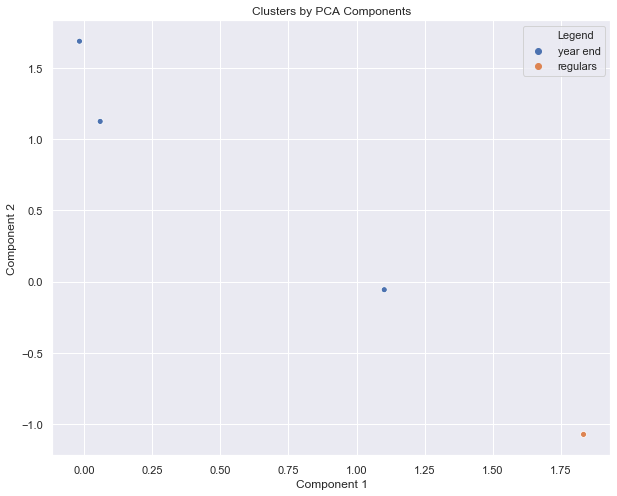

In [493]:
#

#plotting with the first two components
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']

plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segn_pca_Kmeans_group['Legend'],   )
plt.title('Clusters by PCA Components')
plt.show()

No handles with labels found to put in legend.


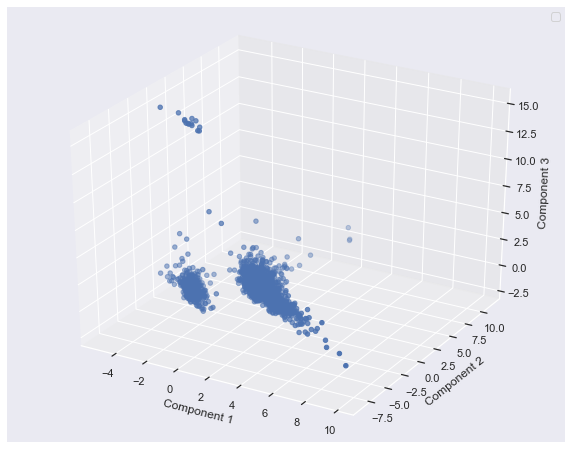

In [494]:
from mpl_toolkits import mplot3d

x = df_segm_pca_kmeans['Component 1']
y = df_segm_pca_kmeans['Component 2']
z = df_segm_pca_kmeans["Component 3"]


fig= plt.figure(figsize = (10,8))

ax = fig.add_subplot(projection='3d', )

ax.scatter(x,y,z, c=df_segm_pca_kmeans["Legend"], s-50, alpha =0.6])

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()
plt.show()

##### Using logistic regression to predict customer that will bring revenue

In [495]:
data_lr=data_pd.copy()

In [496]:
data_lr['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [497]:
data_lr.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [498]:
data_lr_feature_columns = data_lr.columns
data_lr_feature_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [499]:
#label Encoding

data_lr['Weekend'] = le.fit_transform(data_lr.Weekend)
data_lr['Month'] = le.fit_transform(data_lr.VisitorType)
data_lr['Revenue'] = le.fit_transform(data_lr.Revenue)

data_lr[['Weekend','Month','Revenue']]

,Weekend,Month,Revenue
0,0,2,0
1,0,2,0
2,0,2,0
3,0,2,0
4,1,2,0
...,...,...,...
12325,1,2,0
12326,1,2,0
12327,1,2,0
12328,0,2,0


In [500]:
# one hot encoding 

data_lr_one_hot_cols = one_hot_encode_cols = data_lr.dtypes[data_lr.dtypes == np.object] 
data_lr_one_hot_encode_cols = one_hot_encode_cols.index.tolist() #list of categorical fields


data_lr = pd.get_dummies(data_lr, columns=data_lr_one_hot_encode_cols,drop_first=True) 
data_lr.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,1


In [501]:
data_lr_feature_columns = data_lr.columns
data_lr_feature_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [502]:
#splitting data to X and y
y = data_lr['Revenue']
X = data_lr.drop("Revenue", axis=1)

In [503]:
target = "Revenue"
X_feature_cols = X.columns
X_feature_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [504]:
#stratiffied shuffle split

from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuff_split.split(data_lr[X_feature_cols],data_lr['Revenue']))

X_train = data_lr.loc[train_idx, X_feature_cols]
y_train = data_lr.loc[train_idx, 'Revenue']

X_test = data_lr.loc[test_idx, X_feature_cols]
y_test =data_lr.loc[test_idx, 'Revenue']

In [505]:
y_train.value_counts(normalize=True)

0    0.845209
1    0.154791
Name: Revenue, dtype: float64

In [506]:
y_test.value_counts(normalize=True)

0    0.845364
1    0.154636
Name: Revenue, dtype: float64

In [423]:
#scaling the X variables

X_train_s = s.fit_transform(X_train)

X_test_s = s.transform(X_test)

PCA on X and y

In [509]:
X_s = s.fit_transform(X_train)


In [510]:
# performing PCA on the X and y

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 18): #NB:there are 20 columns in the scaled data
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X_s)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               "ind_var":PCAmod.explained_variance_ratio_[-1],
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': X_feature_cols,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,ind_var,var
n,,,
1,PCA(n_components=1),0.191023,0.191023
2,PCA(n_components=2),0.130628,0.321651
3,PCA(n_components=3),0.098366,0.420017
4,PCA(n_components=4),0.079458,0.499475
5,PCA(n_components=5),0.057237,0.556713
6,PCA(n_components=6),0.056825,0.613537
7,PCA(n_components=7),0.053859,0.667396
8,PCA(n_components=8),0.053091,0.720487
9,PCA(n_components=9),0.051943,0.77243


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'cummulative explained variance')

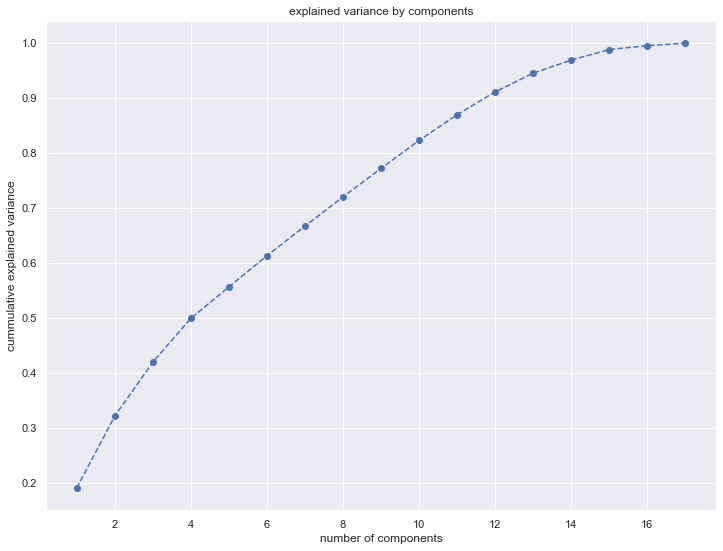

In [511]:
plt.figure(figsize=(12,9))
plt.plot(range(1,18), pca_df['var'], marker = 'o', linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')

Text(0, 0.5, 'explained variance')

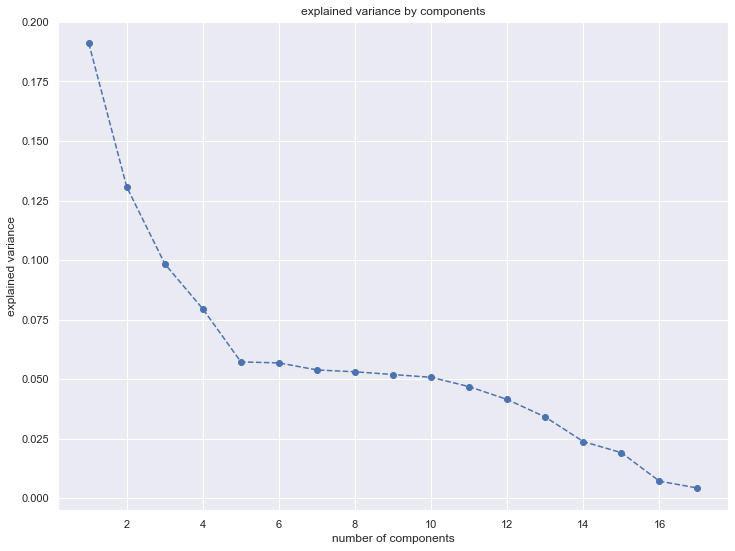

In [512]:
plt.figure(figsize=(12,9))
plt.plot(range(1,18), pca_df['ind_var'], marker = 'o', linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('explained variance')

In [513]:
# pick n=5

PCAmod_lr = PCA(n_components=5) 
lr_pca=PCAmod_lr.fit_transform(X_s)

In [515]:
lr_pca.shape

(8631, 5)

In [518]:
y_train.shape

(8631,)

In [514]:
# Predicting with Logistic Regression (Without pca)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)

y_prob = lr.predict_proba(X_test_s)


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)



score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3127
           1       0.72      0.35      0.47       572

    accuracy                           0.88      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699

   accuracy  precision    recall        f1       auc
0  0.878886   0.721429  0.353147  0.474178  0.865755


In [520]:
# Predicting with Logistic Regression (With pca)

from sklearn.linear_model import LogisticRegression


#split the pca data to test and training set
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(lr_pca, y_train, test_size=0.3, random_state=0)

lr = LogisticRegression().fit(X_train_lr, y_train_lr)
y_pred = lr.predict(X_test_lr)

y_prob = lr.predict_proba(X_test_lr)


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test_lr, y_pred)
print(cr)



score_df = pd.DataFrame({'accuracy': accuracy_score(y_test_lr, y_pred),
                         'precision': precision_score(y_test_lr, y_pred),
                         'recall': recall_score(y_test_lr, y_pred),
                         'f1': f1_score(y_test_lr, y_pred),
                         'auc': roc_auc_score(y_test_lr, y_prob[:,1])},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2169
           1       0.71      0.11      0.19       421

    accuracy                           0.85      2590
   macro avg       0.78      0.55      0.55      2590
weighted avg       0.83      0.85      0.80      2590

   accuracy  precision    recall        f1       auc
0  0.848263   0.712121  0.111639  0.193018  0.796181


In [528]:
# predicting with kernel pca

from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA( kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, n_components=5)
kernel_score=kernel_pca.fit_transform(X_s)

y_pred = lr.predict(X_test_lr)

y_prob = lr.predict_proba(X_test_lr)


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test_lr, y_pred)
print(cr)



score_df = pd.DataFrame({'accuracy': accuracy_score(y_test_lr, y_pred),
                         'precision': precision_score(y_test_lr, y_pred),
                         'recall': recall_score(y_test_lr, y_pred),
                         'f1': f1_score(y_test_lr, y_pred),
                         'auc': roc_auc_score(y_test_lr, y_prob[:,1])},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2169
           1       0.00      0.00      0.00       421

    accuracy                           0.84      2590
   macro avg       0.42      0.50      0.46      2590
weighted avg       0.70      0.84      0.76      2590

   accuracy  precision  recall   f1       auc
0  0.837452        0.0     0.0  0.0  0.317548


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\

In [524]:
# to get idea of feature importances

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=400, random_state=42, 
                            warm_start=True,
                            n_jobs=-1)         

RF = RandomForestClassifier().fit(X_train_s, y_train)
y_pred = RF.predict(X_test_s)

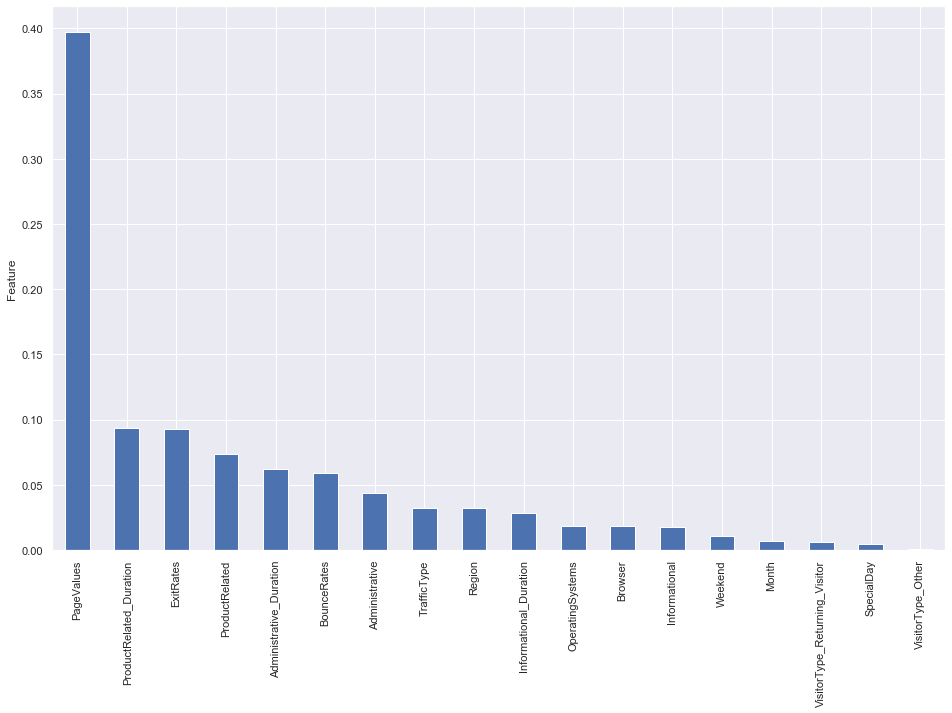

In [526]:
feature_imp = pd.Series(RF.feature_importances_, index=X_feature_cols,).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 10))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');